In [22]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import cv2

In [ ]:
# Define paths using absolute paths
# Change directory accordingly
TRAIN_DIR = "/Users/hachitran/Desktop/1. School/1. FAU/Courses/2025/Fall 2025/CAP 4630/archive/clouds_train"
TEST_DIR = "/Users/hachitran/Desktop/1. School/1. FAU/Courses/2025/Fall 2025/CAP 4630/archive/clouds_test"

In [26]:
# Get all class folder names
train_path = Path(TRAIN_DIR)
class_names = sorted([d.name for d in train_path.iterdir() if d.is_dir()])

# Define image size (adjust if needed)
IMG_WIDTH = 224
IMG_HEIGHT = 224

# Lists to store images and labels
images = []
labels = []

# Load images from each class folder
for class_idx, class_name in enumerate(class_names):
    class_folder = train_path / class_name
    
    # Get all .jpg files in this class folder
    image_files = list(class_folder.glob("*.jpg"))
    
    print(f"\nLoading {class_name}...")
    
    for img_file in image_files:
        # Read image with OpenCV
        img = cv2.imread(str(img_file))
        
        if img is not None:
            # Convert BGR to RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Resize to consistent size
            img_resized = cv2.resize(img_rgb, (IMG_WIDTH, IMG_HEIGHT))
            
            images.append(img_resized)
            labels.append(class_idx)

# Convert to numpy arrays
images_array = np.array(images)
labels_array = np.array(labels)

print(f"\n✓ Loaded {len(images_array)} images total")
print(f"✓ Image shape: {images_array[0].shape}")
print(f"✓ Labels shape: {labels_array.shape}")



Loading cirriform clouds...

Loading clear sky...

Loading cumulonimbus clouds...

Loading cumulus clouds...

Loading high cumuliform clouds...

Loading stratiform clouds...

Loading stratocumulus clouds...

✓ Loaded 474 images total
✓ Image shape: (224, 224, 3)
✓ Labels shape: (474,)


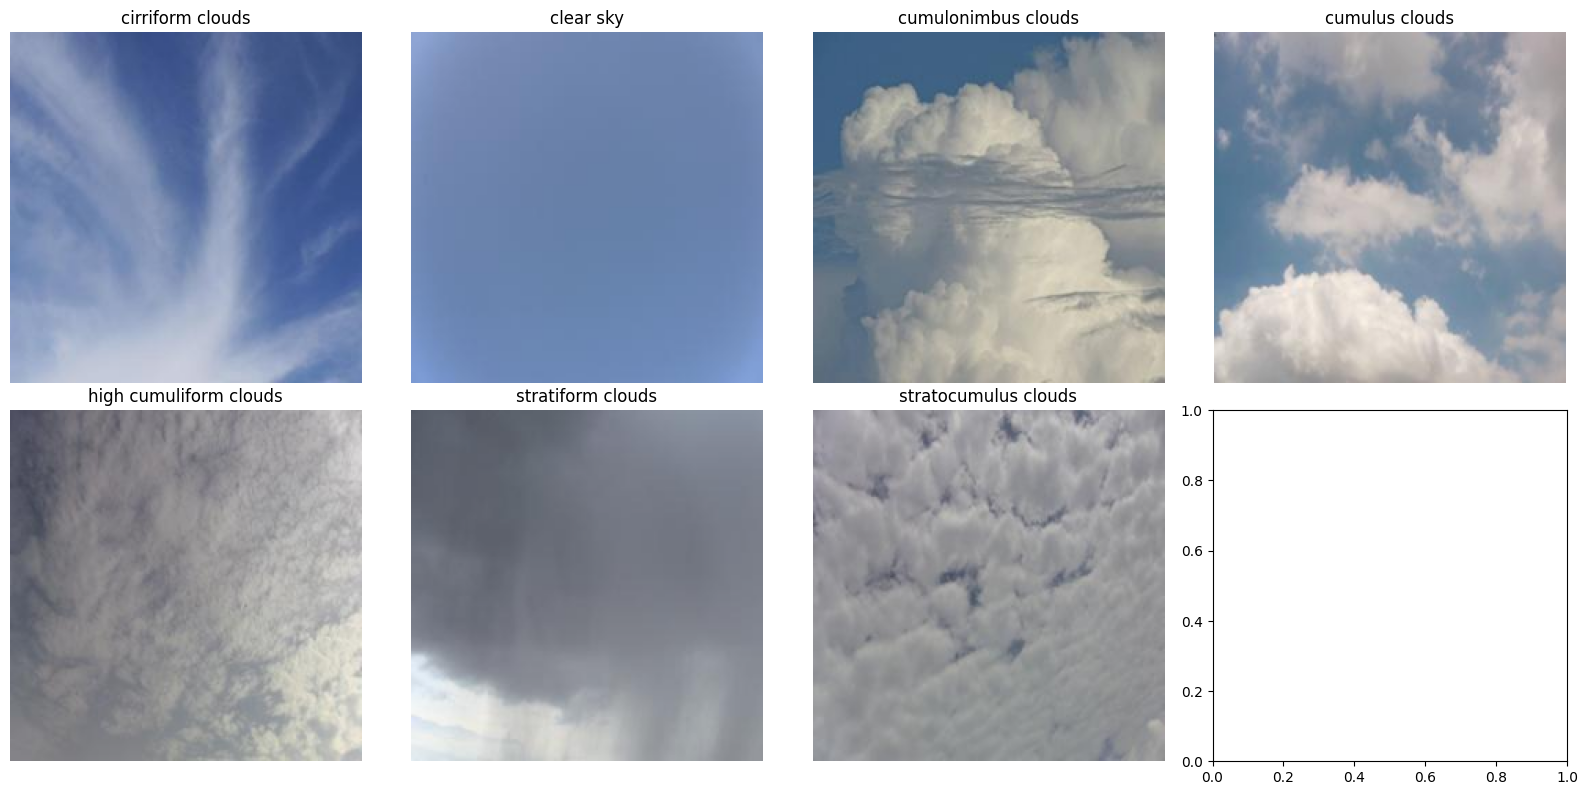

In [21]:
# Show random sample images from each class
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# Set random seed for reproducibility
np.random.seed(42)

sample_idx = 0
for class_idx, class_name in enumerate(class_names):
    # Find random image of this class
    indices = np.where(labels_array == class_idx)[0]
    if len(indices) > 0:
        # Pick a random image from this class
        img_idx = np.random.choice(indices)
        axes[sample_idx].imshow(images_array[img_idx])
        axes[sample_idx].set_title(f"{class_name}")
        axes[sample_idx].axis('off')
        sample_idx += 1

plt.tight_layout()
plt.show()


In [17]:
# Normalize pixel values to [0, 1]
images_normalized = images_array / 255.0

print(f"Pixel values range: [{images_normalized.min():.2f}, {images_normalized.max():.2f}]")


Pixel values range: [0.00, 1.00]
